['Corrugation', 'Grinding Marks', 'Other Features', 'Rail Head Anamoly', 'Squat']


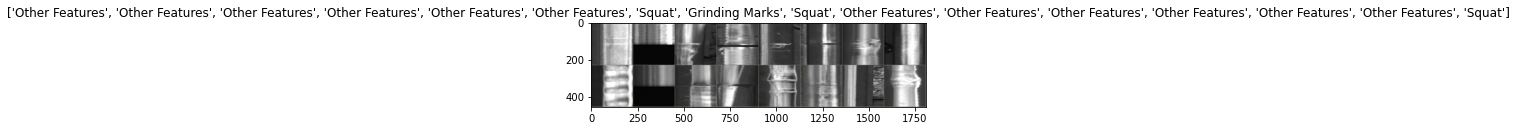

Epoch 0/119
----------
train Loss: 0.6345 Acc: 0.8140
test Loss: 0.8234 Acc: 0.7554

Epoch 1/119
----------
train Loss: 0.5149 Acc: 0.8433
test Loss: 0.6687 Acc: 0.8152

Epoch 2/119
----------
train Loss: 0.4515 Acc: 0.8613
test Loss: 0.5402 Acc: 0.8315

Epoch 3/119
----------
train Loss: 0.4257 Acc: 0.8579
test Loss: 0.6276 Acc: 0.8587

Epoch 4/119
----------
train Loss: 0.3447 Acc: 0.8880
test Loss: 0.6935 Acc: 0.8424

Epoch 5/119
----------
train Loss: 0.3079 Acc: 0.8986
test Loss: 0.8009 Acc: 0.7989

Epoch 6/119
----------
train Loss: 0.2687 Acc: 0.9063
test Loss: 1.1190 Acc: 0.7446

Epoch 7/119
----------
train Loss: 0.2560 Acc: 0.9077
test Loss: 0.7859 Acc: 0.8424

Epoch 8/119
----------
train Loss: 0.2105 Acc: 0.9244
test Loss: 0.7910 Acc: 0.8641

Epoch 9/119
----------
train Loss: 0.1674 Acc: 0.9395
test Loss: 1.1525 Acc: 0.6793

Epoch 10/119
----------
train Loss: 0.1226 Acc: 0.9610
test Loss: 1.1244 Acc: 0.8533

Epoch 11/119
----------
train Loss: 0.1286 Acc: 0.9553
test Loss

test Loss: 1.6372 Acc: 0.8315

Epoch 96/119
----------
train Loss: 0.0003 Acc: 1.0000
test Loss: 1.6782 Acc: 0.8424

Epoch 97/119
----------
train Loss: 0.0001 Acc: 1.0000
test Loss: 1.8319 Acc: 0.8478

Epoch 98/119
----------
train Loss: 0.0002 Acc: 1.0000
test Loss: 1.9147 Acc: 0.8478

Epoch 99/119
----------
train Loss: 0.0002 Acc: 1.0000
test Loss: 2.1050 Acc: 0.8533

Epoch 100/119
----------
train Loss: 0.0001 Acc: 1.0000
test Loss: 2.0978 Acc: 0.8533

Epoch 101/119
----------
train Loss: 0.0578 Acc: 0.9842
test Loss: 2.0100 Acc: 0.7717

Epoch 102/119
----------
train Loss: 0.0244 Acc: 0.9940
test Loss: 1.8748 Acc: 0.8533

Epoch 103/119
----------
train Loss: 0.0086 Acc: 0.9971
test Loss: 1.9160 Acc: 0.8478

Epoch 104/119
----------
train Loss: 0.0075 Acc: 0.9974
test Loss: 1.9538 Acc: 0.8587

Epoch 105/119
----------
train Loss: 0.0151 Acc: 0.9951
test Loss: 1.7604 Acc: 0.8261

Epoch 106/119
----------
train Loss: 0.0049 Acc: 0.9983
test Loss: 2.1455 Acc: 0.7609

Epoch 107/119
--

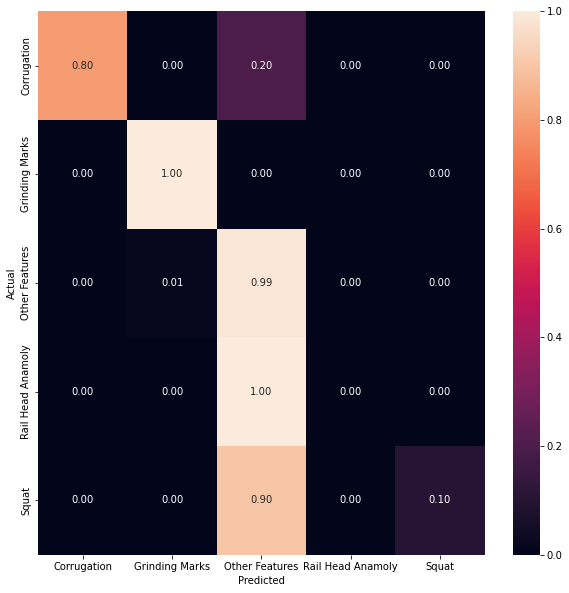

In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import sys

#from torch.utils.mobile_optimizer import optimize_for_mobile

#from torch.utils.tensorboard import SummaryWriter
#writer = SummaryWriter('data/fyp_model_1')

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

data_transforms = {
    'train': transforms.Compose([
        #transforms.RandomResizedCrop(224),
        transforms.Resize((224,224)),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'test': transforms.Compose([
        transforms.Resize((224,224)),
        #transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

data_dir = 'C:/Users/lamma/FYP/Input'

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'test']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(class_names)



def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()

# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)    
    

imshow(out, title=[class_names[x] for x in classes])


def train_model(model, criterion, optimizer, num_epochs=20):
    since = time.time()
    
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        # Each epoch has a training and validation phase
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()
                        
                        
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                
        
            #if phase == 'train':
            #    scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            # tensorboard
            #writer.add_scalar('training loss', epoch_loss, epoch)
            #writer.add_scalar('accuracy', epoch_acc , epoch)       
            
                
            # deep copy the model
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                
            

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    
    
    
    
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


#### Finetuning the convnet ####
# Load a pretrained model and reset final fully connected layer.

model = models.resnet18(pretrained=True)

    
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 11.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 5)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.Adam(model.parameters(), lr=0.001)  #0.0005

#tensorboard
#writer.add_graph(model, inputs)
#writer.close()
#sys.exit()


#step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, num_epochs=120)

#export model
torch.save(model, 'final_version_1_with_epoch_120.ptl')

print("model successfully exported")


# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in dataloaders['test']:
        
        output = model(inputs.to(device)) # Feed Network
        
        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
class_names = image_datasets['train'].classes 

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
cf_matrix = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(cf_matrix, annot=True, fmt='.2f', xticklabels=[i for i in class_names], yticklabels=[i for i in class_names])

plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.savefig('output.png')

